In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette('Set2')
#sns.set_style('white')
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [6]:
# Sum of values equal zero in each column
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [7]:
# Value of median
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [8]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)

In [9]:
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [10]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<ipython-input-11-d9b2783bbc0c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=data, palette='Set2')


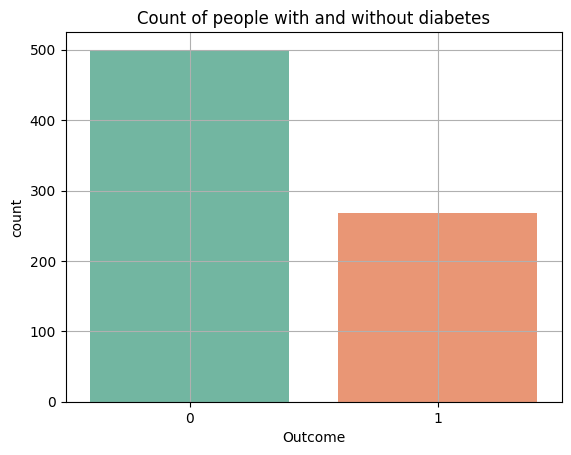

In [11]:
sns.countplot(x='Outcome',data=data, palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [12]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

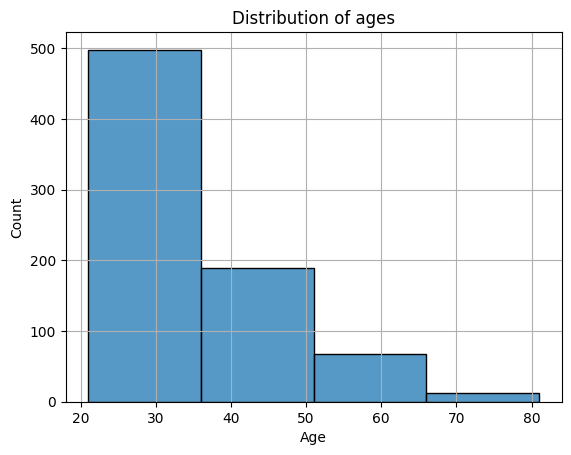

In [13]:
# Range of Ages
sns.histplot(data['Age'], bins=4)
plt.title('Distribution of ages')
plt.grid()

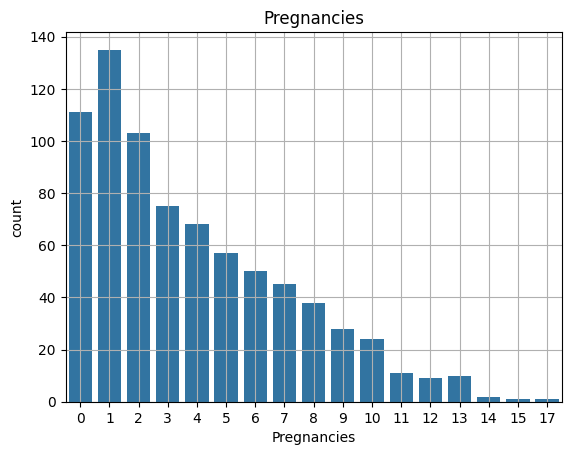

In [14]:
# Pregnancy count per woman
sns.countplot(x='Pregnancies', data=data)
plt.title('Pregnancies')
plt.grid()

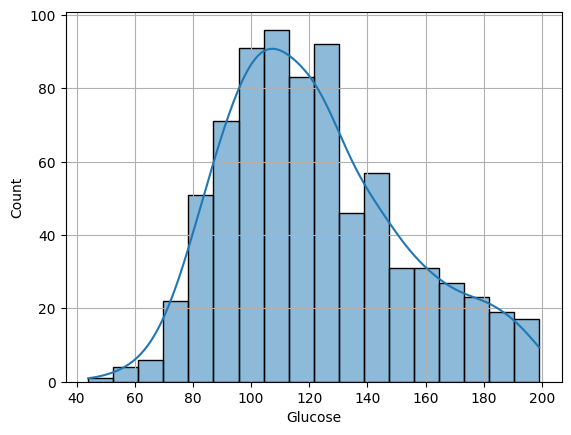

In [15]:
sns.histplot(data['Glucose'], kde=True)
plt.grid()

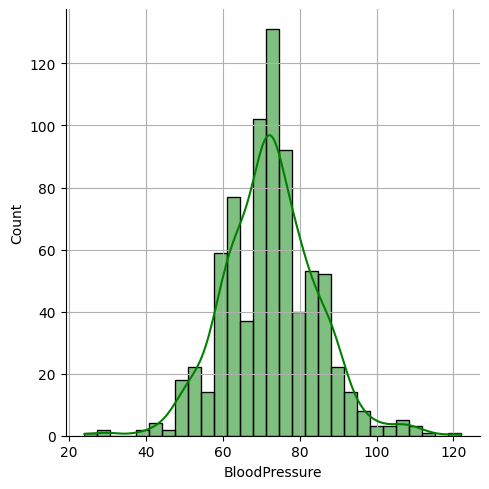

In [16]:
sns.displot(data['BloodPressure'],kde=True, color='green')
plt.grid()

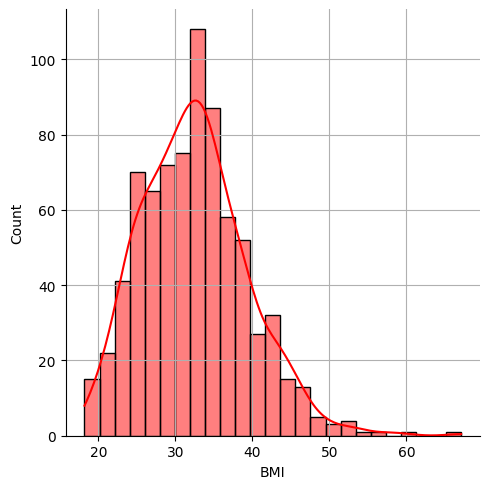

In [17]:
sns.displot(data['BMI'], kde=True, color='red')
plt.grid()

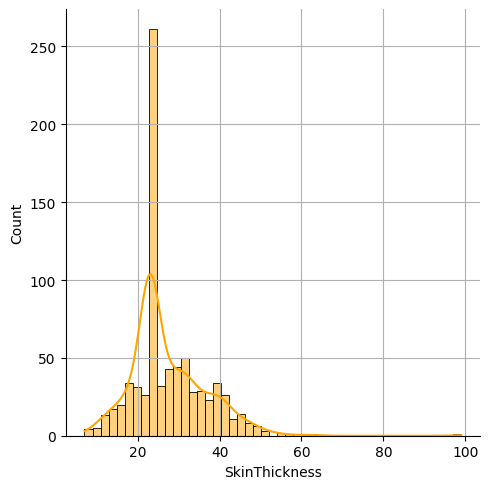

In [18]:
sns.displot(data['SkinThickness'], kde=True, color='orange')
plt.grid()

In [19]:
# Blood pressure lower than 80 is normal

fig = px.scatter(data, x="Age", y='BloodPressure',
             size="Glucose", color="Outcome",
                 hover_data=["BMI"], log_x=True, size_max=12,
                 color_continuous_scale=[[0, 'rgb(102, 194, 165)'], [1.0, 'rgb(225, 128, 114)']],
                 title="General view"
                 )
fig.add_shape(type="line",
    x0=20, y0=80, x1=85, y1=80,
    line=dict(color="blue",width=2,dash="dash")
 )

fig.show()

In [20]:
# We differentiate the data with Outcome 0 and 1
out_0 = data[data['Outcome']==0]
out_1 = data[data['Outcome']==1]

In [21]:
# We'll buil a function to represent de differents distributions with respect to "Outcome"
def visualization(variable):
    fig=go.Figure()
    fig.add_trace(go.Box(y=out_0[variable],name=0,marker_color='rgb(102, 194, 165)',boxpoints="all",whiskerwidth=0.3))
    fig.add_trace(go.Box(y=out_1[variable],name=1,marker_color='rgb(225, 128, 114)',boxpoints="all",whiskerwidth=0.3))
    fig.update_layout(title="{} distribution with respect to Outcome".format(variable),height=600)
    fig.show()

In [22]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in data[columns]:
    visualization(column)

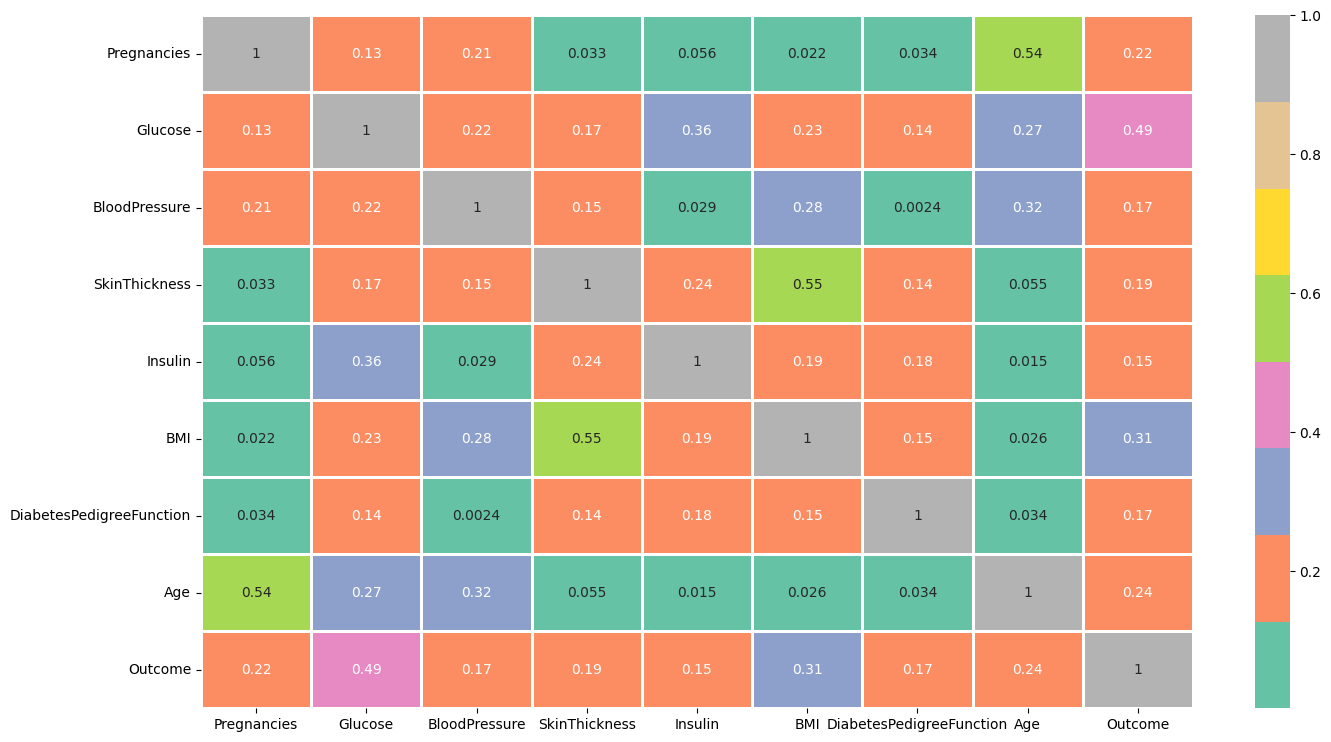

In [23]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

In [24]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=7)

SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.fit_transform(X_test)

In [25]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))


    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [26]:
def roc_curve(Y_test, Y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
    score = metrics.auc(fpr, tpr)

    fig = px.area(
        #fpr = False Positive Rate; tpr= True Positive Rate
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

Logistic Regression¶


Accuracy: 77.273 %
Mean squared error:  0.227


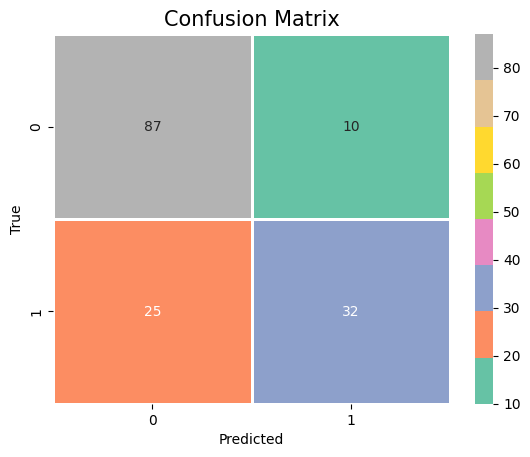

In [27]:
LogR= LogisticRegression()
LogR.fit(X_train,Y_train)
Y_pred= LogR.predict(X_test)

LogR_accuracy= round(accuracy_score(Y_test,Y_pred),5)*100

impressions(LogR,LogR_accuracy)

Y_score = LogR.predict_proba(X_test)[:,1]
roc_curve(Y_test,Y_score)

K-Nearest Neighbors¶


In [28]:
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(KNN,KNN_accuracy)

Y_score = KNN.predict_proba(X_test)[:,1]
roc_curve(Y_test,Y_score)

Accuracy: 79.221 %
Mean squared error:  0.208


Random Forest¶


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=200, random_state=5, criterion='gini', max_depth=100)
rfc.fit(X_train,Y_train)
Y_pred= rfc.predict(X_test)

rfc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(rfc,rfc_accuracy)

Accuracy: 80.51899999999999 %
Mean squared error:  0.195


In [30]:
models_accuracy = {
    'Logistic Regression': LogR_accuracy,
    'K-Nearest Neighbors' : KNN_accuracy,
    'Random Forest': rfc_accuracy

}

In [31]:
results = pd.DataFrame([[key, models_accuracy[key]] for key in models_accuracy.keys()],
                       columns=['Models', 'Accuracies']).sort_values('Accuracies', ascending=False)
results

Models  Accuracies
2        Random Forest      80.519
1  K-Nearest Neighbors      79.221
0  Logistic Regression      77.273